In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Remit_EcoDev_Consolidated_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       100 non-null    object
 1   Country Code  100 non-null    object
 2   Region        100 non-null    object
 3   Element       100 non-null    object
 4   Unit          100 non-null    object
 5   Scale         100 non-null    object
 6   2000          81 non-null     object
 7   2001          81 non-null     object
 8   2002          82 non-null     object
 9   2003          83 non-null     object
 10  2004          83 non-null     object
 11  2005          83 non-null     object
 12  2006          83 non-null     object
 13  2007          83 non-null     object
 14  2008          83 non-null     object
 15  2009          83 non-null     object
 16  2010          88 non-null     object
 17  2011          86 non-null     object
 18  2012          88 non-null     object
 19  2013     

In [ ]:
data.head()

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,India,IND,Emerging and Developing Asia,Remittance inflow,US Dollar,Million,"12,883","14,273","15,736","20,999",...,"70,389","68,910","62,744","68,967","78,790","83,332","83,149","89,375","111,222","125,000"
1,India,IND,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,468.396,485.44,514.938,607.701,...,"2,039.13","2,103.59","2,294.80","2,651.47","2,702.93","2,835.61","2,674.85","3,167.27","3,353.47","3,572.08"
2,India,IND,Emerging and Developing Asia,Percent of GDP,Percentage,Units,2.751,2.940,3.056,3.456,...,3.452,3.276,2.734,2.601,2.915,2.939,3.109,2.822,3.317,3.499
3,India,IND,Emerging and Developing Asia,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,"2,211.97","2,370.88","2,499.31","2,748.99",...,"6,781.02","7,159.80","7,735.00","8,276.93","9,012.96","9,519.04","9,087.49","10,425.07","11,938.77","13,342.45"
4,India,IND,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,46.94,49.025,51.475,53.583,...,118.85,124.683,130.325,135,139.608,146.267,155.283,163.833,174.733,184.125


In [ ]:
data_groups = data.groupby('Element')
print(data_groups.groups.keys())

dict_keys(['Gross domestic product, current prices', 'Households and NPISHs Final consumption expenditure', 'Human Development Index', 'Inflation, average consumer prices', 'Multidimensional poverty headcount ratio (World Bank)', 'Percent of GDP', 'Remittance inflow', 'Unemployment rate'])


In [ ]:
data_groups

In [ ]:
gdp_data = data_groups.get_group('Gross domestic product, current prices')
exp_data = data_groups.get_group('Households and NPISHs Final consumption expenditure')
hdi_data = data_groups.get_group('Human Development Index')
inf_data = data_groups.get_group('Inflation, average consumer prices')
pov_data = data_groups.get_group('Multidimensional poverty headcount ratio (World Bank)')
gpp_data = data_groups.get_group('Percent of GDP')
rem_data = data_groups.get_group('Remittance inflow')
une_data = data_groups.get_group('Unemployment rate')

In [ ]:
# plot all columns in one
def plot_all(df, title):
  fig, ax = plt.subplots()
  for column in df.columns:
    df[column].plot(ax=ax, label=column)
  plt.title(title)
  ax.legend()
  plt.show()

In [ ]:
def get_unique(df):
  for col in ['Unit', 'Scale']:
    print(df[col].unique())

In [ ]:
def modify_data(df):
  mod = df.drop(['Country', 'Region', 'Element', 'Unit', 'Scale'], axis=1)
  mod = mod.set_index('Country Code')
  mod = mod.transpose()
  mod.index = pd.to_datetime(mod.index, format='%Y').year
  mod[mod.columns] = mod[mod.columns].apply(lambda x: x.str.replace(',',''))
  #mod[mod.columns] = pd.to_numeric(mod[mod.columns], errors='coerce')
  mod[mod.columns] = mod[mod.columns].apply(pd.to_numeric, errors='coerce')

  return mod

# **GDP**

In [ ]:
gdp_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,India,IND,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,468.396,485.44,514.938,607.701,...,"2,039.13","2,103.59","2,294.80","2,651.47","2,702.93","2,835.61","2,674.85","3,167.27","3,353.47","3,572.08"
3,India,IND,Emerging and Developing Asia,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,"2,211.97","2,370.88","2,499.31","2,748.99",...,"6,781.02","7,159.80","7,735.00","8,276.93","9,012.96","9,519.04","9,087.49","10,425.07","11,938.77","13,342.45"
11,Mexico,MEX,Latin America and The Caribbean,"Gross domestic product, current prices",US Dollar,Billion,742.061,796.055,810.666,765.55,...,"1,364.51","1,213.29","1,112.23","1,190.72","1,256.30","1,305.20","1,120.83","1,313.07","1,463.32","1,788.90"
13,Mexico,MEX,Latin America and The Caribbean,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,"1,354.60","1,378.86","1,396.97","1,441.44",...,"2,254.44","2,309.50","2,457.95","2,540.45","2,649.90","2,687.61","2,488.24","2,751.68","3,061.74","3,275.80"
21,China,CHN,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,"1,205.53","1,333.65","1,465.83","1,656.96",...,"10,524.24","11,113.51","11,226.90","12,265.33","13,841.81","14,340.60","14,862.56","17,759.31","17,848.54","17,662.04"
23,China,CHN,Emerging and Developing Asia,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,"3,657.93","4,051.44","4,489.41","5,036.83",...,"17,200.69","17,880.34","18,701.70","19,814.06","21,636.22","23,308.57","24,145.86","27,386.73","30,191.13","32,931.36"
31,Philippines,PHL,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,83.667,78.921,84.307,87.039,...,297.484,306.446,318.627,328.481,346.842,376.823,361.751,394.087,404.284,436.622
33,Philippines,PHL,Emerging and Developing Asia,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,267.984,282.373,297.418,318.718,...,699.662,733.864,798.601,854.095,929.064,"1,002.46",919.019,"1,016.08","1,169.96","1,280.13"
41,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Gross domestic product, current prices",US Dollar,Billion,104.752,102.273,90.261,85.163,...,321.634,350.119,351.443,246.826,263.156,317.894,382.525,423.3,475.231,393.909
43,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Gross domestic product, current prices",Purchasing power parity; international dollars,Billion,415.739,440.081,461.157,485.279,...,"1,037.07","1,122.07","1,117.37","1,119.18","1,205.80","1,294.06","1,358.00","1,466.47","1,674.15","1,800.43"


In [ ]:
get_unique(gdp_data)

['US Dollar' 'Purchasing power parity; international dollars']
['Billion']


In [ ]:
gdp_groups = gdp_data.groupby('Unit')

In [ ]:
print(gdp_groups.groups.keys())

dict_keys(['Purchasing power parity; international dollars', 'US Dollar'])


In [ ]:
gdp_us = gdp_groups.get_group('US Dollar')
gdp_us

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,India,IND,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,468.396,485.44,514.938,607.701,...,"2,039.13","2,103.59","2,294.80","2,651.47","2,702.93","2,835.61","2,674.85","3,167.27","3,353.47","3,572.08"
11,Mexico,MEX,Latin America and The Caribbean,"Gross domestic product, current prices",US Dollar,Billion,742.061,796.055,810.666,765.55,...,"1,364.51","1,213.29","1,112.23","1,190.72","1,256.30","1,305.20","1,120.83","1,313.07","1,463.32","1,788.90"
21,China,CHN,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,"1,205.53","1,333.65","1,465.83","1,656.96",...,"10,524.24","11,113.51","11,226.90","12,265.33","13,841.81","14,340.60","14,862.56","17,759.31","17,848.54","17,662.04"
31,Philippines,PHL,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,83.667,78.921,84.307,87.039,...,297.484,306.446,318.627,328.481,346.842,376.823,361.751,394.087,404.284,436.622
41,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Gross domestic product, current prices",US Dollar,Billion,104.752,102.273,90.261,85.163,...,321.634,350.119,351.443,246.826,263.156,317.894,382.525,423.3,475.231,393.909
51,Pakistan,PAK,Middle East and Central Asia,"Gross domestic product, current prices",US Dollar,Billion,99.421,96.784,98.169,112.507,...,271.422,299.93,313.623,339.229,356.163,321.071,300.41,348.481,374.748,338.237
61,Bangladesh,BGD,Emerging and Developing Asia,"Gross domestic product, current prices",US Dollar,Billion,61.687,62.537,65.036,71.755,...,207.102,233.687,265.236,293.755,321.379,351.238,373.902,416.265,460.201,446.349
71,Nigeria,NGA,Sub Saharan Africa,"Gross domestic product, current prices",US Dollar,Billion,67.824,73.128,93.983,102.935,...,568.499,492.437,404.649,375.745,421.737,448.12,429.423,441.424,477.376,374.947
81,Guatemala,GTM,Latin America and The Caribbean,"Gross domestic product, current prices",US Dollar,Billion,18.124,19.735,21.924,23.092,...,57.835,62.18,66.034,71.624,73.331,77.156,77.714,86.041,95.004,102.036
91,Uzbekistan,UZB,Middle East and Central Asia,"Gross domestic product, current prices",US Dollar,Billion,17.195,14.581,12.106,12.697,...,80.848,85.662,85.658,62.081,52.87,60.284,60.225,69.601,81.167,90.882


In [ ]:
gdp_us = modify_data(gdp_us)
gdp_us

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,468.396,742.061,1205.53,83.667,104.752,99.421,61.687,67.824,18.124,17.195
2001,485.440,796.055,1333.65,78.921,102.273,96.784,62.537,73.128,19.735,14.581
2002,514.938,810.666,1465.83,84.307,90.261,98.169,65.036,93.983,21.924,12.106
2003,607.701,765.550,1656.96,87.039,85.163,112.507,71.755,102.935,23.092,12.697
2004,709.152,819.459,1949.45,95.002,82.855,132.206,77.152,130.345,24.977,15.045
2005,820.385,917.572,2290.02,107.420,94.127,145.209,79.530,169.645,28.179,17.939
2006,940.260,1020.270,2754.15,127.653,112.902,161.871,86.028,222.791,31.308,21.344
2007,1216.740,1102.360,3555.66,155.980,137.055,184.141,95.374,262.215,35.028,27.963
2008,1198.900,1161.550,4577.28,181.007,170.797,202.204,109.765,330.260,40.242,35.858
2009,1341.890,943.437,5088.99,176.132,198.316,187.074,122.760,297.458,37.997,41.945


In [ ]:
gdp_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     24 non-null     float64
 1   MEX     24 non-null     float64
 2   CHN     24 non-null     float64
 3   PHL     24 non-null     float64
 4   EGY     24 non-null     float64
 5   PAK     24 non-null     float64
 6   BGD     24 non-null     float64
 7   NGA     24 non-null     float64
 8   GTM     24 non-null     float64
 9   UZB     24 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


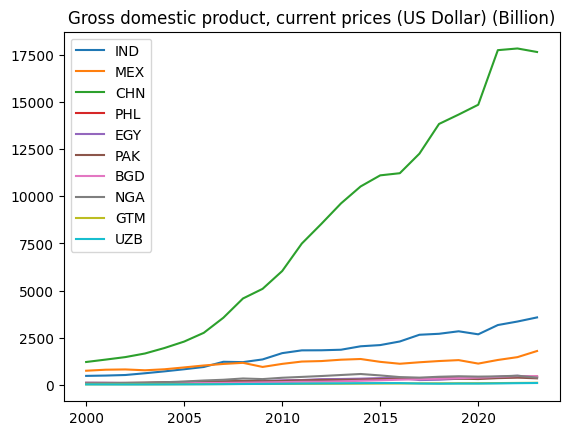

In [ ]:
plot_all(gdp_us, 'Gross domestic product, current prices (US Dollar) (Billion)')

# **EXP**

In [ ]:
exp_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7,India,IND,Emerging and Developing Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,3.439589377,5.952897392,2.870478559,5.92532039,...,6.393855559,7.928111121,8.130124545,6.238808064,7.089546624,5.168800889,-5.229045685,11.23451496,7.527440832,NaN
17,Mexico,MEX,Latin America and The Caribbean,Households and NPISHs Final consumption expend...,Percent growth,Units,8.73189331,2.821176553,1.65729706,2.121294233,...,1.979887828,2.686500822,1.926264357,1.723119057,1.46309284,1.166862774,-10.63672435,8.097102227,6.182357633,NaN
27,China,CHN,Emerging and Developing Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,11.59031309,6.984927191,9.127184652,6.15899084,...,9.194508214,8.703140975,8.93698558,9.535066891,8.321404872,6.432470866,-2.500603946,12.2279168,0.259059619,NaN
37,Philippines,PHL,Emerging and Developing Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,5.197103462,3.942284446,5.099981977,5.379560364,...,5.78445518,6.444572485,7.14960846,5.957366507,5.765216371,5.866914547,-7.95652928,4.211486933,8.287553588,NaN
47,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,5.000955291,3.981779444,2.000744787,2.325581395,...,4.395761741,3.079138664,4.650389196,4.189446917,1.140768986,1.552043734,7.363177923,6.201501311,2.772731063,NaN
57,Pakistan,PAK,Middle East and Central Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,0.4066465008,3.95753882,0.2778506963,3.329416126,...,5.698012818,3.037716691,7.815298237,6.928245692,7.207226576,5.570647672,-2.831800935,9.439722653,6.730776899,NaN
67,Bangladesh,BGD,Emerging and Developing Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,4.975141457,4.132644873,1.057186162,4.051704832,...,4.005587379,5.817129635,3.002255147,6.26914014,9.413220737,4.855419609,2.996799856,8.015464419,7.476516769,NaN
77,Nigeria,NGA,Sub Saharan Africa,Households and NPISHs Final consumption expend...,Percent growth,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Guatemala,GTM,Latin America and The Caribbean,Households and NPISHs Final consumption expend...,Percent growth,Units,3.505630393,3.780122047,3.367258544,3.859736831,...,4.538740795,5.142897356,4.071841949,3.273435974,3.54791562,4.719269033,-1.635384742,8.472572254,4.242793965,NaN
97,Uzbekistan,UZB,Middle East and Central Asia,Households and NPISHs Final consumption expend...,Percent growth,Units,NaN,NaN,NaN,NaN,...,8.734472295,11.77111051,8.25461173,4.161655458,7.356352887,5.553344844,0.236488782,11.47235814,11.37852626,na


In [ ]:
get_unique(exp_data)

['Percent growth']
['Units']


In [ ]:
exp_data = modify_data(exp_data)
exp_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,3.439589,8.731893,11.590313,5.197103,5.000955,0.406647,4.975141,NaN,3.505630,NaN
2001,5.952897,2.821177,6.984927,3.942284,3.981779,3.957539,4.132645,NaN,3.780122,NaN
2002,2.870479,1.657297,9.127185,5.099982,2.000745,0.277851,1.057186,NaN,3.367259,NaN
2003,5.925320,2.121294,6.158991,5.379560,2.325581,3.329416,4.051705,NaN,3.859737,NaN
2004,5.171126,2.328696,8.086469,5.904392,2.097902,8.197225,5.969459,NaN,3.851585,NaN
2005,7.455695,2.143542,11.024622,4.444468,4.828767,12.186531,6.731798,NaN,4.278767,NaN
2006,4.935776,4.505066,10.217097,4.182405,6.435805,1.643614,7.047649,NaN,4.683159,NaN
2007,7.281564,1.203329,13.776158,4.809431,6.936771,5.066110,7.433895,NaN,5.390099,NaN
2008,4.452197,0.995182,8.783059,3.852613,5.730712,1.684448,3.980285,NaN,4.349553,NaN
2009,5.000777,-7.133003,9.991439,2.531449,5.665673,0.627227,2.291738,NaN,-0.295332,NaN


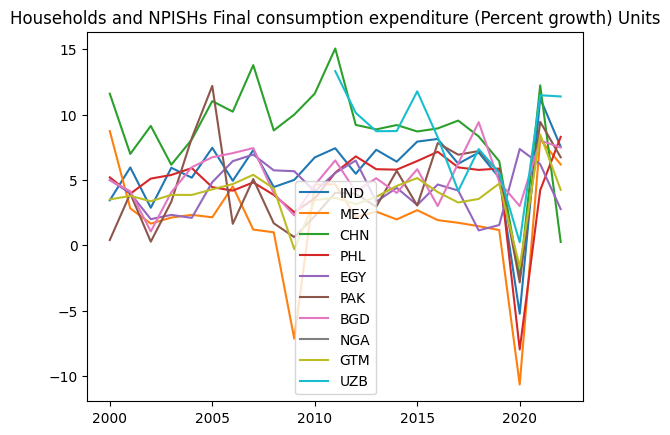

In [ ]:
plot_all(exp_data, 'Households and NPISHs Final consumption expenditure (Percent growth) Units')

In [ ]:
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     23 non-null     float64
 1   MEX     23 non-null     float64
 2   CHN     23 non-null     float64
 3   PHL     23 non-null     float64
 4   EGY     23 non-null     float64
 5   PAK     23 non-null     float64
 6   BGD     23 non-null     float64
 7   NGA     0 non-null      float64
 8   GTM     23 non-null     float64
 9   UZB     12 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


# **HDI**

In [ ]:
hdi_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
6,India,IND,Emerging and Developing Asia,Human Development Index,HDI,Index,0.49,0.495,0.501,0.514,...,0.611,0.619,0.63,0.636,0.636,0.638,0.638,0.633,0.644,NaN
16,Mexico,MEX,Latin America and The Caribbean,Human Development Index,HDI,Index,0.709,0.712,0.719,0.725,...,0.765,0.769,0.773,0.776,0.779,0.781,0.757,0.757,0.796,NaN
26,China,CHN,Emerging and Developing Asia,Human Development Index,HDI,Index,0.586,0.597,0.608,0.619,...,0.732,0.741,0.749,0.757,0.766,0.775,0.781,0.785,0.788,NaN
36,Philippines,PHL,Emerging and Developing Asia,Human Development Index,HDI,Index,0.635,0.64,0.646,0.652,...,0.693,0.696,0.696,0.7,0.706,0.714,0.705,0.692,0.71,NaN
46,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Human Development Index,HDI,Index,0.629,0.633,0.634,0.632,...,0.688,0.695,0.702,0.709,0.717,0.724,0.729,0.726,0.728,NaN
56,Pakistan,PAK,Middle East and Central Asia,Human Development Index,HDI,Index,0.434,0.441,0.447,0.455,...,0.519,0.525,0.533,0.534,0.535,0.537,0.536,0.537,0.54,NaN
66,Bangladesh,BGD,Emerging and Developing Asia,Human Development Index,HDI,Index,0.491,0.498,0.505,0.511,...,0.585,0.604,0.613,0.622,0.636,0.646,0.657,0.662,0.67,NaN
76,Nigeria,NGA,Sub Saharan Africa,Human Development Index,HDI,Index,NaN,NaN,NaN,0.449,...,0.513,0.52,0.526,0.528,0.53,0.537,0.539,0.542,0.548,NaN
86,Guatemala,GTM,Latin America and The Caribbean,Human Development Index,HDI,Index,0.551,0.556,0.561,0.566,...,0.64,0.629,0.633,0.636,0.64,0.645,0.638,0.63,0.629,NaN
96,Uzbekistan,UZB,Middle East and Central Asia,Human Development Index,HDI,Index,0.603,0.61,0.617,0.624,...,0.698,0.701,0.709,0.714,0.719,0.725,0.716,0.721,0.727,NaN


In [ ]:
get_unique(hdi_data)

['HDI']
['Index']


In [ ]:
hdi_data = modify_data(hdi_data)
hdi_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,0.490,0.709,0.586,0.635,0.629,0.434,0.491,NaN,0.551,0.603
2001,0.495,0.712,0.597,0.640,0.633,0.441,0.498,NaN,0.556,0.610
2002,0.501,0.719,0.608,0.646,0.634,0.447,0.505,NaN,0.561,0.617
2003,0.514,0.725,0.619,0.652,0.632,0.455,0.511,0.449,0.566,0.624
2004,0.523,0.729,0.631,0.658,0.635,0.468,0.517,0.461,0.570,0.631
2005,0.532,0.733,0.643,0.659,0.637,0.477,0.525,0.468,0.574,0.636
2006,0.541,0.741,0.656,0.659,0.642,0.485,0.530,0.475,0.580,0.642
2007,0.550,0.743,0.668,0.663,0.649,0.490,0.533,0.479,0.590,0.655
2008,0.557,0.745,0.678,0.666,0.656,0.489,0.535,0.482,0.599,0.660
2009,0.562,0.745,0.689,0.666,0.661,0.493,0.547,0.486,0.606,0.666


In [ ]:
hdi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     23 non-null     float64
 1   MEX     23 non-null     float64
 2   CHN     23 non-null     float64
 3   PHL     23 non-null     float64
 4   EGY     23 non-null     float64
 5   PAK     23 non-null     float64
 6   BGD     23 non-null     float64
 7   NGA     20 non-null     float64
 8   GTM     23 non-null     float64
 9   UZB     23 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


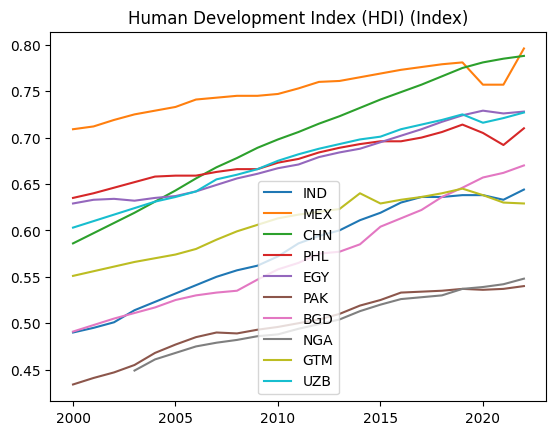

In [ ]:
plot_all(hdi_data, 'Human Development Index (HDI) (Index)')

#**INF**

In [ ]:
inf_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,India,IND,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,46.94,49.025,51.475,53.583,...,118.85,124.683,130.325,135,139.608,146.267,155.283,163.833,174.733,184.125
5,India,IND,Emerging and Developing Asia,"Inflation, average consumer prices",Percent change,Units,3.817,4.442,4.997,4.096,...,5.833,4.908,4.525,3.587,3.414,4.769,6.165,5.506,6.653,5.375
14,Mexico,MEX,Latin America and The Caribbean,"Inflation, average consumer prices",Index,Units,46.468,49.426,51.916,54.278,...,85.335,87.655,90.127,95.573,100.254,103.899,107.429,113.545,122.513,129.281
15,Mexico,MEX,Latin America and The Caribbean,"Inflation, average consumer prices",Percent change,Units,9.486,6.366,5.037,4.55,...,4.019,2.719,2.82,6.042,4.898,3.635,3.398,5.693,7.898,5.525
24,China,CHN,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,70.496,71.007,70.461,71.281,...,98.578,100,101.996,103.606,105.774,108.847,111.559,112.583,114.807,115.068
25,China,CHN,Emerging and Developing Asia,"Inflation, average consumer prices",Percent change,Units,0.348,0.724,-0.769,1.163,...,1.994,1.443,1.996,1.579,2.093,2.905,2.492,0.918,1.975,0.228
34,Philippines,PHL,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,50.192,52.9,54.358,55.567,...,90.558,91.183,92.308,94.942,99.983,102.375,104.825,108.942,115.283,122.175
35,Philippines,PHL,Emerging and Developing Asia,"Inflation, average consumer prices",Percent change,Units,6.545,5.396,2.757,2.223,...,3.594,0.69,1.234,2.853,5.31,2.392,2.393,3.927,5.821,5.978
44,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Inflation, average consumer prices",Index,Units,15.858,16.242,16.608,17.175,...,48.083,53.367,58.817,72.658,87.808,99.992,105.692,110.448,119.836,149.067
45,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Inflation, average consumer prices",Percent change,Units,2.849,2.417,2.258,3.412,...,10.093,10.988,10.212,23.534,20.851,13.875,5.7,4.5,8.5,24.392


In [ ]:
get_unique(inf_data)

['Index' 'Percent change']
['Units']


In [ ]:
inf_groups = inf_data.groupby('Unit')

In [ ]:
print(inf_groups.groups.keys())

dict_keys(['Index', 'Percent change'])


In [ ]:
inf_idx = inf_groups.get_group('Index')
inf_idx

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,India,IND,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,46.94,49.025,51.475,53.583,...,118.85,124.683,130.325,135,139.608,146.267,155.283,163.833,174.733,184.125
14,Mexico,MEX,Latin America and The Caribbean,"Inflation, average consumer prices",Index,Units,46.468,49.426,51.916,54.278,...,85.335,87.655,90.127,95.573,100.254,103.899,107.429,113.545,122.513,129.281
24,China,CHN,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,70.496,71.007,70.461,71.281,...,98.578,100,101.996,103.606,105.774,108.847,111.559,112.583,114.807,115.068
34,Philippines,PHL,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,50.192,52.9,54.358,55.567,...,90.558,91.183,92.308,94.942,99.983,102.375,104.825,108.942,115.283,122.175
44,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,"Inflation, average consumer prices",Index,Units,15.858,16.242,16.608,17.175,...,48.083,53.367,58.817,72.658,87.808,99.992,105.692,110.448,119.836,149.067
54,Pakistan,PAK,Middle East and Central Asia,"Inflation, average consumer prices",Index,Units,29.357,30.652,31.736,32.721,...,94.334,98.602,101.426,105.633,109.779,117.177,129.763,141.314,158.481,204.728
64,Bangladesh,BGD,Emerging and Developing Asia,"Inflation, average consumer prices",Index,Units,74.82,76.176,78.009,81.036,...,183.164,194.896,206.427,217.657,230.243,242.848,256.563,270.822,287.477,313.396
74,Nigeria,NGA,Sub Saharan Africa,"Inflation, average consumer prices",Index,Units,32.241,38.324,43.262,49.333,...,158.815,173.125,200.298,233.352,261.574,291.386,329.985,385.927,458.662,571.766
84,Guatemala,GTM,Latin America and The Caribbean,"Inflation, average consumer prices",Index,Units,29.189,31.318,33.863,35.763,...,66.955,68.554,71.603,74.773,77.576,80.449,83.033,86.573,92.531,98.276
94,Uzbekistan,UZB,Middle East and Central Asia,"Inflation, average consumer prices",Index,Units,8.226,10.467,13.324,14.989,...,48.973,53.119,57.805,65.826,77.362,88.599,100,110.849,123.538,135.831


In [ ]:
inf_idx = modify_data(inf_idx)
inf_idx

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,46.940,46.468,70.496,50.192,15.858,29.357,74.820,32.241,29.189,8.226
2001,49.025,49.426,71.007,52.900,16.242,30.652,76.176,38.324,31.318,10.467
2002,51.475,51.916,70.461,54.358,16.608,31.736,78.009,43.262,33.863,13.324
2003,53.583,54.278,71.281,55.567,17.175,32.721,81.036,49.333,35.763,14.989
2004,55.725,56.826,74.057,58.233,18.575,34.214,87.632,56.733,38.471,16.087
2005,57.775,59.094,75.397,62.100,20.192,37.388,93.316,66.864,41.973,17.808
2006,61.667,61.241,76.503,65.483,21.058,40.351,100.000,72.358,44.728,20.143
2007,65.317,63.672,80.154,67.392,23.350,43.486,107.205,76.267,47.778,22.390
2008,71.333,66.938,84.838,72.925,26.092,48.702,117.858,85.099,53.206,25.329
2009,78.900,70.483,84.251,76.017,30.308,58.231,125.701,95.768,54.195,28.444


In [ ]:
inf_idx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     24 non-null     float64
 1   MEX     24 non-null     float64
 2   CHN     24 non-null     float64
 3   PHL     24 non-null     float64
 4   EGY     24 non-null     float64
 5   PAK     24 non-null     float64
 6   BGD     24 non-null     float64
 7   NGA     24 non-null     float64
 8   GTM     24 non-null     float64
 9   UZB     24 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


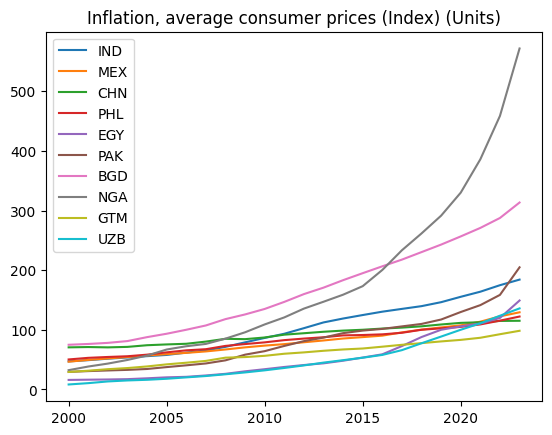

In [ ]:
plot_all(inf_idx, 'Inflation, average consumer prices (Index) (Units)')

#**POV**

In [ ]:
pov_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
8,India,IND,Emerging and Developing Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Mexico,MEX,Latin America and The Caribbean,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,4.6,NaN,2.9,NaN,2.5,NaN,2.6,NaN,1.7,NaN
28,China,CHN,Emerging and Developing Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Philippines,PHL,Emerging and Developing Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,8.6,NaN,NaN,4.4,NaN,NaN,4.1,NaN,NaN
48,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,2.6,NaN,3.5,NaN,2.3,NaN,NaN,NaN,NaN
58,Pakistan,PAK,Middle East and Central Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,18.5,NaN,NaN,16.7,NaN,NaN,NaN,NaN,NaN
68,Bangladesh,BGD,Emerging and Developing Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,20.5,NaN,NaN,NaN,NaN,NaN,5.9,NaN
78,Nigeria,NGA,Sub Saharan Africa,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39.7,NaN,NaN,NaN,NaN,NaN
88,Guatemala,GTM,Latin America and The Caribbean,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Uzbekistan,UZB,Middle East and Central Asia,Multidimensional poverty headcount ratio (Worl...,Percent of population,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN


In [ ]:
get_unique(pov_data)

['Percent of population']
['Units']


In [ ]:
pov_data = modify_data(pov_data)
pov_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pov_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     0 non-null      float64
 1   MEX     7 non-null      float64
 2   CHN     0 non-null      float64
 3   PHL     4 non-null      float64
 4   EGY     5 non-null      float64
 5   PAK     5 non-null      float64
 6   BGD     3 non-null      float64
 7   NGA     1 non-null      float64
 8   GTM     1 non-null      float64
 9   UZB     1 non-null      float64
dtypes: float64(10)
memory usage: 2.0 KB


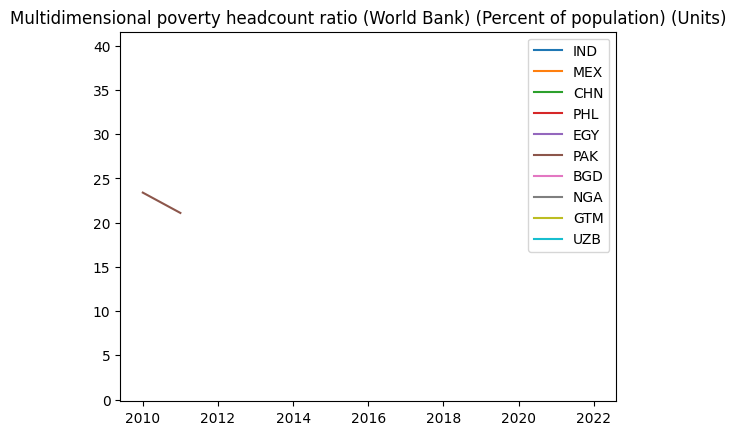

In [ ]:
plot_all(pov_data, 'Multidimensional poverty headcount ratio (World Bank) (Percent of population) (Units)')

#**GPP**

In [ ]:
gpp_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,India,IND,Emerging and Developing Asia,Percent of GDP,Percentage,Units,2.751,2.940,3.056,3.456,...,3.452,3.276,2.734,2.601,2.915,2.939,3.109,2.822,3.317,3.499
12,Mexico,MEX,Latin America and The Caribbean,Percent of GDP,Percentage,Units,1.014,1.275,1.361,2.175,...,1.818,2.162,2.580,2.710,2.847,2.990,3.826,4.122,4.175,3.745
22,China,CHN,Emerging and Developing Asia,Percent of GDP,Percentage,Units,0.063,0.091,0.161,0.279,...,0.592,0.575,0.543,0.521,0.487,0.477,0.400,0.298,0.286,0.280
32,Philippines,PHL,Emerging and Developing Asia,Percent of GDP,Percentage,Units,8.276,11.100,11.547,11.764,...,9.644,9.724,9.774,9.988,9.748,9.333,9.643,9.309,9.411,9.161
42,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Percent of GDP,Percentage,Units,2.723,2.847,3.205,3.477,...,6.085,5.234,5.290,10.022,9.696,8.425,7.739,7.438,5.962,6.144
52,Pakistan,PAK,Middle East and Central Asia,Percent of GDP,Percentage,Units,1.081,1.510,3.620,3.523,...,6.353,6.437,6.319,5.853,5.950,6.931,8.684,8.985,7.971,7.096
62,Bangladesh,BGD,Emerging and Developing Asia,Percent of GDP,Percentage,Units,3.190,3.365,4.395,4.448,...,7.237,6.545,5.118,4.596,4.844,5.228,5.817,5.334,4.673,5.153
72,Nigeria,NGA,Sub Saharan Africa,Percent of GDP,Percentage,Units,2.052,1.595,1.286,1.033,...,3.694,4.189,4.868,5.865,5.764,5.313,4.007,4.414,4.216,5.467
82,Guatemala,GTM,Latin America and The Caribbean,Percent of GDP,Percentage,Units,3.290,3.211,7.299,9.297,...,9.945,10.424,11.150,11.719,12.870,13.810,14.676,17.907,19.160,19.459
92,Uzbekistan,UZB,Middle East and Central Asia,Percent of GDP,Percentage,Units,0,0,0,0,...,8.430,5.654,6.765,11.485,14.393,14.176,11.762,13.329,20.619,17.715


In [ ]:
get_unique(gpp_data)

['Percentage']
['Units']


In [ ]:
gpp_data = modify_data(gpp_data)
gpp_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,2.751,1.014,0.063,8.276,2.723,1.081,3.190,2.052,3.290,0.000
2001,2.940,1.275,0.091,11.100,2.847,1.510,3.365,1.595,3.211,0.000
2002,3.056,1.361,0.161,11.547,3.205,3.620,4.395,1.286,7.299,0.000
2003,3.456,2.175,0.279,11.764,3.477,3.523,4.448,1.033,9.297,0.000
2004,2.644,2.424,0.341,12.071,4.032,2.984,4.645,1.744,10.520,0.000
2005,2.697,2.478,1.032,12.784,5.330,2.947,5.425,8.630,10.883,5.738
2006,3.013,2.602,1.001,12.139,4.720,3.164,6.309,7.600,11.818,6.656
2007,3.059,2.438,1.080,10.538,5.586,3.257,6.881,6.870,12.094,6.111
2008,4.169,2.242,1.043,10.414,5.090,3.481,8.145,5.814,10.997,10.128
2009,3.667,2.340,0.817,11.332,3.605,4.660,8.570,6.176,10.533,5.197


In [ ]:
gpp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     24 non-null     float64
 1   MEX     24 non-null     float64
 2   CHN     24 non-null     float64
 3   PHL     24 non-null     float64
 4   EGY     24 non-null     float64
 5   PAK     24 non-null     float64
 6   BGD     24 non-null     float64
 7   NGA     24 non-null     float64
 8   GTM     24 non-null     float64
 9   UZB     24 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


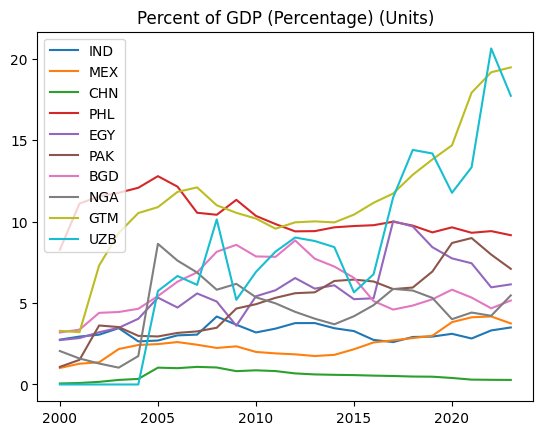

In [ ]:
plot_all(gpp_data, 'Percent of GDP (Percentage) (Units)')

#**REM**

In [ ]:
rem_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,India,IND,Emerging and Developing Asia,Remittance inflow,US Dollar,Million,"12,883","14,273","15,736","20,999",...,"70,389","68,910","62,744","68,967","78,790","83,332","83,149","89,375","111,222","125,000"
10,Mexico,MEX,Latin America and The Caribbean,Remittance inflow,US Dollar,Million,"7,525","10,146","11,029","16,654",...,"24,802","26,233","28,691","32,271","35,768","39,022","42,878","54,130","61,100","67,000"
20,China,CHN,Emerging and Developing Asia,Remittance inflow,US Dollar,Million,758,"1,209","2,353","4,625",...,"62,332","63,938","61,000","63,876","67,414","68,398","59,507","53,000","51,000","49,500"
30,Philippines,PHL,Emerging and Developing Asia,Remittance inflow,US Dollar,Million,"6,924","8,760","9,735","10,239",...,"28,691","29,799","31,142","32,810","33,809","35,167","34,883","36,685","38,049","40,000"
40,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Remittance inflow,US Dollar,Million,"2,852","2,911","2,893","2,961",...,"19,570","18,325","18,590","24,737","25,516","26,781","29,603","31,487","28,333","24,200"
50,Pakistan,PAK,Middle East and Central Asia,Remittance inflow,US Dollar,Million,"1,075","1,461","3,554","3,964",...,"17,244","19,306","19,819","19,856","21,193","22,252","26,089","31,312","29,871","24,000"
60,Bangladesh,BGD,Emerging and Developing Asia,Remittance inflow,US Dollar,Million,"1,968","2,105","2,858","3,192",...,"14,988","15,296","13,574","13,502","15,566","18,364","21,752","22,206","21,504","23,000"
70,Nigeria,NGA,Sub Saharan Africa,Remittance inflow,US Dollar,Million,"1,392","1,167","1,209","1,063",...,"20,999","20,626","19,698","22,037","24,311","23,809","17,208","19,483","20,128","20,500"
80,Guatemala,GTM,Latin America and The Caribbean,Remittance inflow,US Dollar,Million,596,634,"1,600","2,147",...,"5,751","6,482","7,363","8,394","9,438","10,656","11,405","15,408","18,203","19,855"
90,Uzbekistan,UZB,Middle East and Central Asia,Remittance inflow,US Dollar,Million,0,0,0,0,...,"6,815","4,843","5,795","7,130","7,610","8,546","7,084","9,277","16,736","16,100"


In [ ]:
get_unique(rem_data)

['US Dollar']
['Million']


In [ ]:
rem_data = modify_data(rem_data)
rem_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,12883,7525,758,6924,2852,1075,1968,1392,596,0
2001,14273,10146,1209,8760,2911,1461,2105,1167,634,0
2002,15736,11029,2353,9735,2893,3554,2858,1209,1600,0
2003,20999,16654,4625,10239,2961,3964,3192,1063,2147,0
2004,18750,19862,6641,11468,3341,3945,3584,2273,2628,0
2005,22125,22742,23626,13733,5017,4280,4315,14640,3067,1029
2006,28334,26543,27565,15496,5330,5121,5428,16932,3700,1421
2007,37217,26880,38395,16437,7656,5998,6562,18014,4236,1709
2008,49977,26041,47743,18851,8694,7039,8941,19200,4426,3632
2009,49204,22076,41600,19960,7150,8717,10521,18371,4002,2180


In [ ]:
rem_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   IND     24 non-null     int64
 1   MEX     24 non-null     int64
 2   CHN     24 non-null     int64
 3   PHL     24 non-null     int64
 4   EGY     24 non-null     int64
 5   PAK     24 non-null     int64
 6   BGD     24 non-null     int64
 7   NGA     24 non-null     int64
 8   GTM     24 non-null     int64
 9   UZB     24 non-null     int64
dtypes: int64(10)
memory usage: 2.0 KB


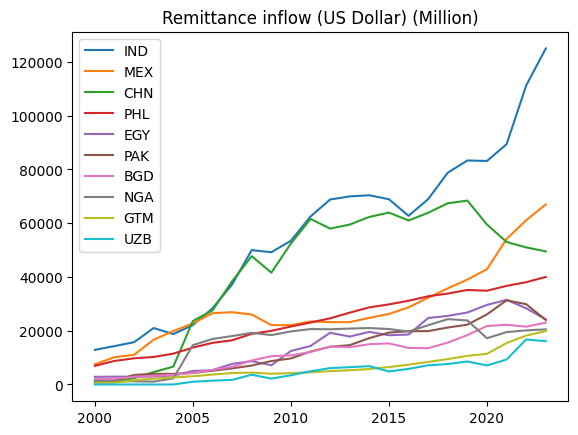

In [ ]:
plot_all(rem_data, 'Remittance inflow (US Dollar) (Million)')

#**UNE**

In [ ]:
une_data

,Country,Country Code,Region,Element,Unit,Scale,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
9,India,IND,Emerging and Developing Asia,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Mexico,MEX,Latin America and The Caribbean,Unemployment rate,Percent of total labor force,Units,2.2,2.768,2.978,3.4,...,4.833,4.346,3.874,3.42,3.321,3.489,4.409,4.14,3.278,2.796
29,China,CHN,Emerging and Developing Asia,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,4.9,5.2,5.2,5.1,5.5,5.2
39,Philippines,PHL,Emerging and Developing Asia,Unemployment rate,Percent of total labor force,Units,11.175,11.125,11.4,11.4,...,6.8,6.275,5.475,5.725,5.325,5.1,10.4,7.783,5.4,4.35
49,"Egypt, Arab Rep.",EGY,Middle East and Central Asia,Unemployment rate,Percent of total labor force,Units,8.995,8.808,10.05,11.275,...,13.365,12.859,12.705,12.245,10.932,8.612,8.296,7.292,7.323,7.185
59,Pakistan,PAK,Middle East and Central Asia,Unemployment rate,Percent of total labor force,Units,7.82,7.82,8.27,8.27,...,6,5.9,5.88,5.832,5.8,6.9,6.562,6.3,6.2,8.5
69,Bangladesh,BGD,Emerging and Developing Asia,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,Nigeria,NGA,Sub Saharan Africa,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,...,7.841,9,13.375,17.462,22.562,NaN,NaN,NaN,NaN,NaN
89,Guatemala,GTM,Latin America and The Caribbean,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Uzbekistan,UZB,Middle East and Central Asia,Unemployment rate,Percent of total labor force,Units,NaN,NaN,5.2,4.9,...,5.087,5.153,5.163,5.83,9.347,8.976,10.531,9.625,8.851,8.351


In [ ]:
get_unique(une_data)

['Percent of total labor force']
['Units']


In [ ]:
une_data = modify_data(une_data)
une_data

Country Code,IND,MEX,CHN,PHL,EGY,PAK,BGD,NGA,GTM,UZB
2000,NaN,2.200,NaN,11.175,8.995,7.820,NaN,NaN,NaN,NaN
2001,NaN,2.768,NaN,11.125,8.808,7.820,NaN,NaN,NaN,NaN
2002,NaN,2.978,NaN,11.400,10.050,8.270,NaN,NaN,NaN,5.200
2003,NaN,3.400,NaN,11.400,11.275,8.270,NaN,NaN,NaN,4.900
2004,NaN,3.919,NaN,11.825,10.526,7.690,NaN,NaN,NaN,3.600
2005,NaN,3.478,NaN,11.350,11.468,7.690,NaN,NaN,NaN,3.000
2006,NaN,3.528,NaN,7.950,10.917,6.200,NaN,NaN,NaN,5.200
2007,NaN,3.611,NaN,7.325,9.205,5.200,NaN,NaN,NaN,4.990
2008,NaN,3.888,NaN,7.400,8.676,5.200,NaN,NaN,NaN,4.893
2009,NaN,5.330,NaN,7.475,9.367,5.460,NaN,NaN,NaN,5.041


In [ ]:
une_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IND     0 non-null      float64
 1   MEX     24 non-null     float64
 2   CHN     7 non-null      float64
 3   PHL     24 non-null     float64
 4   EGY     24 non-null     float64
 5   PAK     24 non-null     float64
 6   BGD     0 non-null      float64
 7   NGA     9 non-null      float64
 8   GTM     0 non-null      float64
 9   UZB     22 non-null     float64
dtypes: float64(10)
memory usage: 2.0 KB


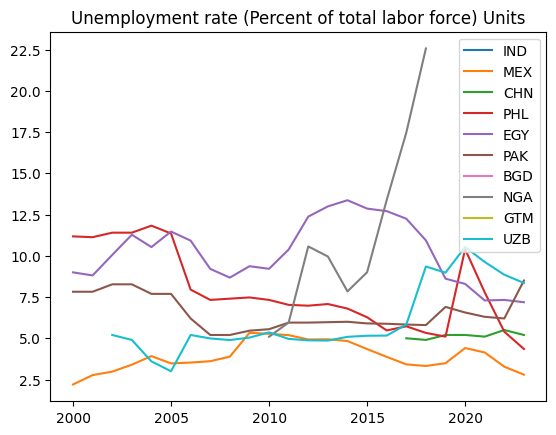

In [ ]:
plot_all(une_data, 'Unemployment rate (Percent of total labor force) Units')